In [1]:
# Down-sampling involves randomly removing observations from the majority class 
# to prevent its signal from dominating the learning algorithm.
# Most common method is resampling without replacement

# - First, we'll separate observations from each class into different DataFrames.
# - Next, we'll resample the majority class without replacement, setting the number 
# of samples to match that of the minority class.
# - Finally, we'll combine the down-sampled majority class DataFrame with 
# the original minority class DataFrame.

In [2]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# module for resampling
from sklearn.utils import resample

In [4]:
# os.getcwd()

In [5]:
# os.listdir(os.getcwd())

In [6]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\steam_all_param_merged_nan_removed.csv")
all_param_df.shape


(31686, 357)

In [7]:
# separate classes in dataframes of success/failure
df_fail = all_param_df[all_param_df.suc_class==0]
df_succ = all_param_df[all_param_df.suc_class==1]

In [8]:
df_fail.shape

(30883, 357)

In [9]:
df_succ.shape

(803, 357)

In [10]:
# Downsample Majority class
df_fail_downsample = resample(df_fail, replace=False, n_samples=1000, random_state=2)

# combine success with downsampled majority class into new dataframe
df_downsampled = pd.concat([df_fail_downsample, df_succ])

# display new class counts
df_downsampled.suc_class.value_counts()

0    1000
1     803
Name: suc_class, dtype: int64

In [11]:
# # reindex the new upsampled dataframe
# df_upsampled.reindex()

In [12]:
# df_upsampled

In [13]:
# # read the csv y_data file into Pandas 
# y_parm_df = pd.read_csv("reduced_data\\y_params.csv")
# y_parm_df.shape

In [14]:
# using binary classification for logistic regression
y_class = df_downsampled['suc_class']

In [15]:
y_class

8031     0
21081    0
5392     0
12192    0
3521     0
        ..
29820    1
30562    1
30598    1
30660    1
31478    1
Name: suc_class, Length: 1803, dtype: int64

In [17]:
# create new X parameters df
x_data = df_downsampled.drop(['appid','maxccu','success_class','suc_class','followers','positive_y', 'negative_y', 'totaltags', 'recommendations', 'positive_x', 'negative_x']  , axis=1)

In [19]:
x_data.shape


(1803, 346)

In [20]:
#label encode the developer name

In [21]:
x_data['developer']=x_data['developer'].astype('category')

In [22]:
x_data['developer']=x_data['developer'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
8031,0,326,Deceptive Games Ltd.,599,80,0,0,38,0,0,...,0,0,0,0,0,0,0,0,0,0
21081,0,1243,THQ Nordic,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5392,0,1156,BRHP,0,0,0,34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12192,0,1176,Softwaves Dist.,499,90,33,34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3521,68,449,Slitherine Ltd.,3999,80,111,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#label encode the publisher name

In [24]:
x_data['publisher']=x_data['publisher'].astype('category')

In [25]:
x_data['publisher']=x_data['publisher'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
8031,0,326,264,599,80,0,0,38,0,0,...,0,0,0,0,0,0,0,0,0,0
21081,0,1243,1011,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5392,0,1156,112,0,0,0,34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12192,0,1176,957,499,90,33,34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3521,68,449,948,3999,80,111,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, random_state=5)

In [27]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
# Train model
y = y_train
X = X_train

clf_1 = LogisticRegression(max_iter=1000).fit(X, y)

C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_1.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_1.score(X_test, y_test)}")

Training Data Score: 0.9297337278106509
Testing Data Score: 0.7671840354767184


In [33]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_1.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       250
           1       0.78      0.67      0.72       201

    accuracy                           0.77       451
   macro avg       0.77      0.76      0.76       451
weighted avg       0.77      0.77      0.76       451



In [35]:
# thinking about baseline results:
# Support is balanced due to sampling adjustments
# Percision: for no success: 76%, for successful games: 84%
# Recall: Fraction of positives found, 78% for 0, 67% for 1
# f1 score: 77%

<AxesSubplot:>

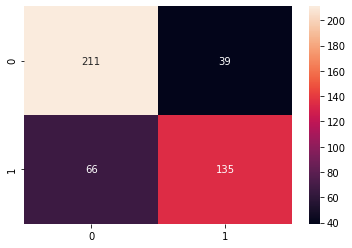

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_1.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [37]:
# Look at co-efficients for meaning

print(x_data.columns.shape, clf_1.coef_.shape)
new_col = np.reshape(clf_1.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list

(346,) (1, 346)
(346,)


,0,1
247,tagmartialarts,0.243099
250,taggolf,0.195350
147,tagloot,0.185438
234,taginventorymanagement,0.169555
163,tagcoopcampaign,0.154387
281,tagdynamicnarration,0.152940
324,tagwordgame,0.148954
79,taglego,0.147453
134,tagclassbased,0.144584
272,tagmusicbasedproceduralgeneration,0.139122


In [38]:
# Apply Area Under ROC Curve scoring model (AUROC)
from sklearn.metrics import roc_auc_score

# Predict class probabilities
prob_y_2 = clf_1.predict_proba(X_test)
prob_y_2

array([[9.30598169e-01, 6.94018310e-02],
       [9.24447248e-01, 7.55527521e-02],
       [8.69822774e-01, 1.30177226e-01],
       [9.10273014e-01, 8.97269862e-02],
       [0.00000000e+00, 1.00000000e+00],
       [9.60537610e-01, 3.94623896e-02],
       [9.44873939e-01, 5.51260612e-02],
       [9.86468007e-01, 1.35319934e-02],
       [9.34568717e-01, 6.54312826e-02],
       [9.99890260e-01, 1.09739540e-04],
       [8.19681978e-01, 1.80318022e-01],
       [6.56572901e-01, 3.43427099e-01],
       [7.22065528e-04, 9.99277934e-01],
       [1.00000000e+00, 2.63659647e-10],
       [4.14568472e-01, 5.85431528e-01],
       [9.71217691e-01, 2.87823091e-02],
       [5.28988945e-01, 4.71011055e-01],
       [9.50090110e-01, 4.99098901e-02],
       [0.00000000e+00, 1.00000000e+00],
       [4.44089210e-16, 1.00000000e+00],
       [1.00000000e+00, 4.87936176e-42],
       [0.00000000e+00, 1.00000000e+00],
       [3.48860573e-01, 6.51139427e-01],
       [9.43503174e-01, 5.64968262e-02],
       [7.933838

In [39]:
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]

In [40]:
# Print AUROC of SMOTE model
# ROC is a probability curve and AUC represents the degree or measure of separability. 
# It tells how much the model is capable of distinguishing between classes. 
# Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.
print( roc_auc_score(y_test, prob_y_2) )

0.7615522388059701


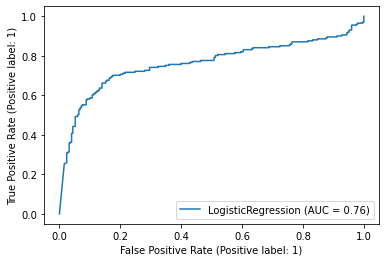

In [41]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_1, X_test, y_test)  
plt.show()